### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [60]:
data = pd.read_csv('data/coupons.csv')

In [61]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [62]:
# check rowcounts - 12,684
row_count = len(data)
print(row_count)


12684


In [63]:
# identify all columns with null values.
null_columns = data.columns[data.isnull().any()].tolist()
print("Columns with null values:", null_columns)

# count null values
null_counts = data.isnull().sum()
print(null_counts)



Columns with null values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [64]:
# remove 'car' field as there are over 95% that have null values.
# all fields are strings. i will keep all other value and remove them when i need to.

car_counts = data['car'].value_counts(dropna=False)
bar_counts = data['Bar'].value_counts(dropna=False)
coffeehouse_counts = data['CoffeeHouse'].value_counts(dropna=False)
carryaway_counts = data['CarryAway'].value_counts(dropna=False)
rlessthan20_counts = data['RestaurantLessThan20'].value_counts(dropna=False)
r20to50_counts = data['Restaurant20To50'].value_counts(dropna=False)
temperature_counts = data['temperature'].value_counts(dropna=False)

print(car_counts)
print()
print(bar_counts)
print()
print(coffeehouse_counts)
print()
print(carryaway_counts)
print()
print(rlessthan20_counts)
print()
print(r20to50_counts)
print()

data.drop('car', axis=1, inplace=True)


car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64



4. What proportion of the total observations chose to accept the coupon?



In [65]:
# counts of y and n of those that accepted the coupons.
# 7210 = Y
# 5474 = N
# 56.84% have accepted coupons


y_counts = (data['Y'] == 1).sum()
n_counts = (data['Y'] == 0).sum()

print(y_counts)
print(n_counts)
print(y_counts/(y_counts+n_counts))


7210
5474
0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [66]:
# bar plot to
coupons_bar = px.bar(data, x='coupon')
coupons_bar.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

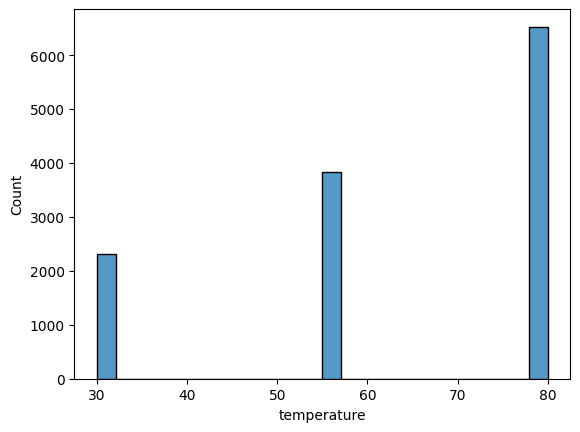

In [67]:
sns.histplot(data=data, x="temperature")


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
# 2017 records where coupon = 'Bar'

bar_counts = (data['coupon'] == 'Bar').sum()
print(bar_counts)
print()

df_bar = data[data['coupon'] == 'Bar']
print (df_bar)



2017

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        ne

2. What proportion of bar coupons were accepted?


In [69]:
# counts of y and n of those that accepted the coupons.
# 827 = Y
# 1190 = N
# 41% have accepted coupons


y_bar_counts = (df_bar['Y'] == 1).sum()
n_bar_counts = (df_bar['Y'] == 0).sum()

print(y_bar_counts)
print(n_bar_counts)
print(y_bar_counts/(y_bar_counts+n_bar_counts))


827
1190
0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [70]:
# there are 1166 people who have visited a bar at least once.
# out of those there are 967 who have visited the bar between 1-3 times a month
# out of those there are 199 who have visited the bar 4 or more times a month

# bar visits 3x or less with coupon: 510
# bar visits 3x or less w/o coupon: 457
# bar visits 4x or more with coupon: 153
# bar visits 4x or more w/0 coupon: 46
# people who went to the bar 3x or less a month have a lower acceptance coupon rate.
# bar visits 3x or less acceptance rate: 52.8%
# bar visits 4x or more acceptance rate: 76.9%

bar_counts = df_bar['Bar'].value_counts(dropna=False)
print(bar_counts)
print()

bar_freq_3_counts = (df_bar['Bar'] == "less1").sum() + (df_bar['Bar'] == "1~3").sum()
bar_freq_4_counts = (df_bar['Bar'] == "4~8").sum()+(df_bar['Bar'] == "gt8").sum()
print("bar visits 3x or less:", bar_freq_3_counts)
print("bar visits 4x or more:", bar_freq_4_counts)
print("bar visits total:", bar_freq_4_counts+bar_freq_3_counts)
print()

bar_freq_3_counts_y = ((df_bar['Bar'] == "less1") & (df_bar['Y'] == 1)).sum() + ((df_bar['Bar'] == "1~3") & (df_bar['Y'] == 1)).sum()
print("bar visits 3x or less with coupon:", bar_freq_3_counts_y)
bar_freq_3_counts_n = ((df_bar['Bar'] == "less1") & (df_bar['Y'] == 0)).sum() + ((df_bar['Bar'] == "1~3") & (df_bar['Y'] == 0)).sum()
print("bar visits 3x or less w/o coupon:", bar_freq_3_counts_n)
bar_freq_4_counts_y = ((df_bar['Bar'] == "4~8") & (df_bar['Y'] == 1)).sum() + ((df_bar['Bar'] == "gt8") & (df_bar['Y'] == 1)).sum()
print("bar visits 4x or more with coupon:", bar_freq_4_counts_y)
bar_freq_4_counts_n = ((df_bar['Bar'] == "4~8") & (df_bar['Y'] == 0)).sum() + ((df_bar['Bar'] == "gt8") & (df_bar['Y'] == 0)).sum()
print("bar visits 4x or more w/0 coupon:", bar_freq_4_counts_n)

bar_freq_3_rate = bar_freq_3_counts_y/(bar_freq_3_counts_y+bar_freq_3_counts_n)
bar_freq_4_rate = bar_freq_4_counts_y/(bar_freq_4_counts_y+bar_freq_4_counts_n)
print("bar visits 3x or less acceptance rate:", bar_freq_3_rate)
print("bar visits 4x or more acceptance rate:", bar_freq_4_rate)




Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       21
Name: count, dtype: int64

bar visits 3x or less: 967
bar visits 4x or more: 199
bar visits total: 1166

bar visits 3x or less with coupon: 510
bar visits 3x or less w/o coupon: 457
bar visits 4x or more with coupon: 153
bar visits 4x or more w/0 coupon: 46
bar visits 3x or less acceptance rate: 0.5274043433298863
bar visits 4x or more acceptance rate: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


```
# This is formatted as code
```



In [71]:
# for those that have visted the bar more at least once a month and over the age 25. the acceptance rate increases compared to those who vist bar less than once a month regardless of age.

bar_counts = df_bar['Bar'].value_counts(dropna=False)
print(bar_counts)
print()

age_counts = df_bar['age'].value_counts(dropna=False)
print(age_counts)
print()

y_counts = df_bar['Y'].value_counts(dropna=False)
print(y_counts)
print()



# for those that have visted the bar more at least once a month and over the age 25 - acceptance rates
## 69.5% acceptance rate
df_filtered1 = df_bar[~(df_bar["age"].isin (['21', 'below21'])) & (df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered1_counts = ((df_filtered1['Y'] == 1)).sum()/(((df_filtered1['Y'] == 1)).sum() + ((df_filtered1['Y'] == 0)).sum())
print("for those that have visted the bar more at least once a month and over the age 25")
print("acceptance rate:", df_filtered1_counts)
print()


# for those that have visted the bar more at least once a month and under the age 25 - acceptance rates
## 67.05% acceptance rate
df_filtered2 = df_bar[(df_bar["age"].isin (['21', 'below21'])) & (df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered2_counts = ((df_filtered2['Y'] == 1)).sum()/(((df_filtered2['Y'] == 1)).sum() + ((df_filtered2['Y'] == 0)).sum())
print("for those that have visted the bar more at least once a month and under the age 25")
print("acceptance rate:", df_filtered2_counts)
print()

# for those that have never visted the bar or less than once a month and under the age 25 - acceptance rates
## 39.33% acceptance rate
df_filtered3 = df_bar[(df_bar["age"].isin (['21', 'below21'])) & ~(df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered3_counts = ((df_filtered3['Y'] == 1)).sum()/(((df_filtered3['Y'] == 1)).sum() + ((df_filtered3['Y'] == 0)).sum())
print("for those that have never visted the bar or less than once a month and under the age 25")
print("acceptance rate:", df_filtered3_counts)
print()

# for those that have never visted the bar or less than once a month and over the age 25 - acceptance rates
## 26.35% acceptance rate
df_filtered4 = df_bar[~(df_bar["age"].isin (['21', 'below21'])) & ~(df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered4_counts = ((df_filtered4['Y'] == 1)).sum()/(((df_filtered4['Y'] == 1)).sum() + ((df_filtered4['Y'] == 0)).sum())
print("for those that have never visted the bar or less than once a month and over the age 25")
print("acceptance rate:", df_filtered4_counts)
print()

#### below is calculate rate based on bar and age grouping
#### not being used for assignment.
#total_counts_df = df_bar.groupby(['Bar', 'age']).size().reset_index(name='Counts')
#n_counts_df = df_bar.query('Y == 0').groupby(['Bar', 'age']).size().reset_index(name='Counts')
#y_counts_df = df_bar.query('Y == 1').groupby(['Bar', 'age']).size().reset_index(name='Counts')

#bar_age_rate = pd.merge(total_counts_df, n_counts_df, on = ['Bar', 'age'])
#bar_age_rate_1 = pd.merge(bar_age_rate, y_counts_df, on = ['Bar', 'age'])
#bar_age_rate_1['acceptance_rate'] = bar_age_rate_1['Counts'] / bar_age_rate_1['Counts_x']
#print (bar_age_rate_1)
#print ()

#bar_age_rate_1["ageBar"] = bar_age_rate_1['age'].astype(str) +"-"+ bar_age_rate_1["Bar"]
#df_sorted = bar_age_rate_1.sort_values(by='acceptance_rate', ascending=False)
#print(df_sorted)
#print()

#px.line(df_sorted, x = ['acceptance_rate'], y = 'ageBar')




Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       21
Name: count, dtype: int64

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

Y
0    1190
1     827
Name: count, dtype: int64

for those that have visted the bar more at least once a month and over the age 25
acceptance rate: 0.6952380952380952

for those that have visted the bar more at least once a month and under the age 25
acceptance rate: 0.6704545454545454

for those that have never visted the bar or less than once a month and under the age 25
acceptance rate: 0.3932926829268293

for those that have never visted the bar or less than once a month and over the age 25
acceptance rate: 0.26349496797804206



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [72]:
# drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
## 71.3% acceptance rate

bar_counts = df_bar['Bar'].value_counts(dropna=False)
print(bar_counts)
print()

passanger_counts = df_bar['passanger'].value_counts(dropna=False)
print(passanger_counts)
print()

occupation_counts = df_bar['occupation'].value_counts(dropna=False)
print(occupation_counts)
print()

y_counts = df_bar['Y'].value_counts(dropna=False)
print(y_counts)
print()

df_filtered1 = df_bar[~(df_bar["passanger"].isin (['Kid(s)'])) & (df_bar["Bar"].isin (['1~3', '4~8', 'gt8'])) & (df_bar["occupation"] != 'Farming Fishing & Forestry')]
df_filtered1_counts = ((df_filtered1['Y'] == 1)).sum()/(((df_filtered1['Y'] == 1)).sum() + ((df_filtered1['Y'] == 0)).sum())
print("drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")
print("acceptance rate:", df_filtered1_counts)
print()

df_filtered2 = df_bar[(df_bar["passanger"].isin (['Kid(s)'])) & ~(df_bar["Bar"].isin (['1~3', '4~8', 'gt8'])) & (df_bar["occupation"] == 'Farming Fishing & Forestry')]
df_filtered2_counts = ((df_filtered2['Y'] == 1)).sum()/(((df_filtered2['Y'] == 1)).sum() + ((df_filtered2['Y'] == 0)).sum())
print("drivers who go to less than once a month visit bars that were had kids seats and had occupations other than farming, fishing, or forestry.")
print("acceptance rate:", df_filtered2_counts)
print()

#### below is calculate rate based on 'Bar', 'passanger', and 'occupation' grouping
#### not being used for assignment.
#df_filtered_1 = df_bar.query("occupation != 'Farming Fishing & Forestry'" and "passanger  != 'Kid(s)'" and "Bar  != 'less1'")
#df_filtered = df_filtered_1.query("Bar != 'never'")


#total_counts_df = df_filtered.groupby(['Bar', 'passanger', 'occupation']).size().reset_index(name='Counts')
#n_counts_df = df_filtered.query('Y == 0').groupby(['Bar', 'passanger', 'occupation']).size().reset_index(name='Counts')
#y_counts_df = df_filtered.query('Y == 1').groupby(['Bar', 'passanger', 'occupation']).size().reset_index(name='Counts')

#bar_passanger_occupation_rate = pd.merge(total_counts_df, n_counts_df, on = ['Bar', 'passanger', 'occupation'])
#bar_passanger_occupation_rate_1 = pd.merge(bar_passanger_occupation_rate, y_counts_df, on = ['Bar', 'passanger', 'occupation'])
#bar_passanger_occupation_rate_1['acceptance_rate'] = bar_passanger_occupation_rate_1['Counts'] / bar_passanger_occupation_rate_1['Counts_x']
#print (bar_passanger_occupation_rate_1)
#print ()

#bar_passanger_occupation_rate_1["BarPassangerOccupation"] = bar_passanger_occupation_rate_1['Bar'].astype(str) +"-"+ bar_passanger_occupation_rate_1["passanger"] +"-"+ bar_passanger_occupation_rate_1["occupation"]
#df_sorted = bar_passanger_occupation_rate_1.sort_values(by='acceptance_rate', ascending=False)
#print(df_sorted)
#print()

#px.line(df_sorted, x = ['acceptance_rate'], y = 'BarPassangerOccupation')


Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       21
Name: count, dtype: int64

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                               

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [73]:
bar_counts = df_bar['Bar'].value_counts(dropna=False)
print(bar_counts)
print()

passanger_counts = df_bar['passanger'].value_counts(dropna=False)
print(passanger_counts)
print()

maritalStatus_counts = df_bar['maritalStatus'].value_counts(dropna=False)
print(maritalStatus_counts)
print()

age_counts = df_bar['age'].value_counts(dropna=False)
print(age_counts)
print()

income_counts = df_bar['income'].value_counts(dropna=False)
print(income_counts)
print()

df_cheap = data[data['coupon'] == 'Restaurant(<20)']
print (df_bar)
print()

RestaurantLessThan20_counts = df_cheap['RestaurantLessThan20'].value_counts(dropna=False)
print(RestaurantLessThan20_counts)
print()

# go to bars more than once a month, had passengers that were not a kid, and were not widowed - acceptance rates
## 68.8% acceptance rate
df_filtered1 = df_bar[(df_bar["occupation"] != 'Kid(s)') & (df_bar["maritalStatus"] != 'Widowed') & (df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered1_counts = ((df_filtered1['Y'] == 1)).sum()/(((df_filtered1['Y'] == 1)).sum() + ((df_filtered1['Y'] == 0)).sum())
print("go to bars more than once a month, had passengers that were not a kid, and were not widowed")
print("acceptance rate:", df_filtered1_counts)
print()

# go to bars more than once a month and are under the age of 30 - acceptance rates
## 72.7% acceptance rate
df_filtered2 = df_bar[(df_bar["age"].isin (['21', '26', 'below21'])) & (df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered2_counts = ((df_filtered2['Y'] == 1)).sum()/(((df_filtered2['Y'] == 1)).sum() + ((df_filtered2['Y'] == 0)).sum())
print("go to bars more than once a month and are under the age of 30")
print("acceptance rate:", df_filtered2_counts)
print()

# go to cheap restaurants more than 4 times a month and income is less than 50K. - acceptance rates
## 71% acceptance rate
df_filtered3 = df_cheap[(df_cheap["RestaurantLessThan20"].isin (['4~8', 'gt8'])) & (df_cheap["income"].isin (['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500']))]
df_filtered3_counts = ((df_filtered3['Y'] == 1)).sum()/(((df_filtered3['Y'] == 1)).sum() + ((df_filtered3['Y'] == 0)).sum())
print("go to cheap restaurants more than 4 times a month and income is less than 50K.")
print("acceptance rate:", df_filtered3_counts)
print()

####
# go to bars more than once a month and are over the age of 30 - acceptance rates
## 64.4% acceptance rate
df_filtered4 = df_bar[~(df_bar["age"].isin (['21', '26', 'below21'])) & (df_bar["Bar"].isin (['1~3', '4~8', 'gt8']))]
df_filtered4_counts = ((df_filtered4['Y'] == 1)).sum()/(((df_filtered4['Y'] == 1)).sum() + ((df_filtered4['Y'] == 0)).sum())
print("go to bars more than once a month and are over the age of 30")
print("acceptance rate:", df_filtered4_counts)
print()


# go to cheap restaurants more than 4 times a month and income is less than 50K. - acceptance rates
## 74.44% acceptance rate
df_filtered5 = df_cheap[(df_cheap["RestaurantLessThan20"].isin (['4~8', 'gt8'])) & ~(df_cheap["income"].isin (['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500']))]
df_filtered5_counts = ((df_filtered5['Y'] == 1)).sum()/(((df_filtered5['Y'] == 1)).sum() + ((df_filtered5['Y'] == 0)).sum())
print("go to cheap restaurants more than 4 times a month and income is less than 50K. - acceptance rates")
print("acceptance rate:", df_filtered5_counts)
print()

# income is 50K and up - go to cheap restaurants
## 58% acceptance rate
df_filtered5 = data[(data["income"].isin (['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500']))]
df_filtered5_counts = ((df_filtered5['Y'] == 1)).sum()/(((df_filtered5['Y'] == 1)).sum() + ((df_filtered5['Y'] == 0)).sum())
print("income is 50K and up")
print("acceptance rate:", df_filtered5_counts)
print()

# income is less than 50K - go to cheap restaurants
## 55.5% acceptance rate
df_filtered5 = data[~(data["income"].isin (['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500']))]
df_filtered5_counts = ((df_filtered5['Y'] == 1)).sum()/(((df_filtered5['Y'] == 1)).sum() + ((df_filtered5['Y'] == 0)).sum())
print("income is less than 50K")
print("acceptance rate:", df_filtered5_counts)
print()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       21
Name: count, dtype: int64

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [74]:
# Findings
## drivers who have gone to bar at least once seems to accept the bar coupons more often than not.
## paired with prior vists, under 30 also likely to accept the coupons.
## interesting to see that those that are low income but eat out a more than 4x a month are less likely to accept coupons
## income alone doesn't drive acceptance coupons




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [75]:
#review the coupon for Carry out & Take away
#counts for carry out and take out: 2393

takeout_counts = (data['coupon'] == 'Carry out & Take away').sum()
print("counts for carry out and take out:", takeout_counts)
print()

df_takeout = data[data['coupon'] == 'Carry out & Take away']
print (df_takeout)


counts for carry out and take out: 2393

           destination  passanger weather  temperature  time  \
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
6      No Urgent Place  Friend(s)   Sunny           55   2PM   
8      No Urgent Place     Kid(s)   Sunny           80  10AM   
19                Work      Alone   Sunny           80   7AM   
25     No Urgent Place  Friend(s)   Sunny           80  10AM   
...                ...        ...     ...          ...   ...   
12665  No Urgent Place  Friend(s)   Sunny           30  10AM   
12672             Home      Alone   Sunny           80   6PM   
12673             Home      Alone   Sunny           30   6PM   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
2      Carry out & Take away         2h  Female  21  Unmarried partner  ...   
6      Carry out & Take away    

In [76]:
carryaway_counts = df_takeout['CarryAway'].value_counts(dropna=False)
print(carryaway_counts)
print()

passanger_counts = df_takeout['passanger'].value_counts(dropna=False)
print(passanger_counts)
print()

maritalStatus_counts = df_takeout['maritalStatus'].value_counts(dropna=False)
print(maritalStatus_counts)
print()

age_counts = df_takeout['age'].value_counts(dropna=False)
print(age_counts)
print()

income_counts = df_takeout['income'].value_counts(dropna=False)
print(income_counts)
print()

weather_counts = df_takeout['weather'].value_counts(dropna=False)
print(weather_counts)
print()

y_counts = df_takeout['Y'].value_counts(dropna=False)
print(y_counts)
print()

#73.55% of carryout and takeout accepts coupon

CarryAway
1~3      864
4~8      820
less1    353
gt8      302
never     32
NaN       22
Name: count, dtype: int64

passanger
Alone        1405
Friend(s)     739
Kid(s)        152
Partner        97
Name: count, dtype: int64

maritalStatus
Married partner      943
Single               928
Unmarried partner    388
Divorced             108
Widowed               26
Name: count, dtype: int64

age
21         486
26         470
31         394
50plus     346
36         249
41         209
46         125
below21    114
Name: count, dtype: int64

income
$25000 - $37499     382
$12500 - $24999     344
$37500 - $49999     341
$100000 or More     323
$50000 - $62499     294
Less than $12500    212
$87500 - $99999     171
$75000 - $87499     169
$62500 - $74999     157
Name: count, dtype: int64

weather
Sunny    1767
Rainy     319
Snowy     307
Name: count, dtype: int64

Y
1    1760
0     633
Name: count, dtype: int64



In [78]:
# takeouts at least once a month.
# takeout acceptance rate: 74.37%
df_filtered1 = df_takeout[(df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8']))]
df_filtered1_counts = ((df_filtered1['Y'] == 1)).sum()/(((df_filtered1['Y'] == 1)).sum() + ((df_filtered1['Y'] == 0)).sum())
print("takeout acceptance rate:", df_filtered1_counts)

# takeouts at least once a month and have kids passanger
# takeout acceptance rate w kids: 70.25%
df_filtered2 = df_takeout[(df_takeout["passanger"] == 'Kid(s)') & (df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8']))]
df_filtered2_counts = ((df_filtered2['Y'] == 1)).sum()/(((df_filtered2['Y'] == 1)).sum() + ((df_filtered2['Y'] == 0)).sum())
print("takeout acceptance rate w kids:", df_filtered2_counts)

# takeouts at least once a month w income less than 50k
# takeout acceptance rate w income less than 50k: 75%
df_filtered3 = df_takeout[(df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8'])) & (df_takeout["income"].isin (['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500']))]
df_filtered3_counts = ((df_filtered3['Y'] == 1)).sum()/(((df_filtered3['Y'] == 1)).sum() + ((df_filtered3['Y'] == 0)).sum())
print("takeout acceptance rate w income less than 50k:", df_filtered3_counts)

# takeouts at least once a month w income 50k and more
# takeout acceptance rate w income 50k and more: 73.7%
df_filtered4 = df_takeout[(df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8'])) & ~(df_takeout["income"].isin (['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500']))]
df_filtered4_counts = ((df_filtered4['Y'] == 1)).sum()/(((df_filtered4['Y'] == 1)).sum() + ((df_filtered4['Y'] == 0)).sum())
print("takeout acceptance rate w income 50k and more:", df_filtered4_counts)

# takeouts at least once a month during sunny weather
# takeout acceptance rate during sunny weather: 77%
df_filtered5 = df_takeout[(df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8'])) & (df_takeout["weather"].isin (['Sunny']))]
df_filtered5_counts = ((df_filtered5['Y'] == 1)).sum()/(((df_filtered5['Y'] == 1)).sum() + ((df_filtered5['Y'] == 0)).sum())
print("takeout acceptance rate during sunny weather:", df_filtered5_counts)

# takeouts at least once a month during rainy weather
# takeout acceptance rate during rainy weather: 61.3%
df_filtered6 = df_takeout[(df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8'])) & (df_takeout["weather"].isin (['Rainy']))]
df_filtered6_counts = ((df_filtered6['Y'] == 1)).sum()/(((df_filtered6['Y'] == 1)).sum() + ((df_filtered6['Y'] == 0)).sum())
print("takeout acceptance rate during rainy weather:", df_filtered6_counts)

# takeouts at least once a month during sunny weather
# takeout acceptance rate during sunny weather: 72.65%
df_filtered7 = df_takeout[(df_takeout["CarryAway"].isin (['1~3', '4~8', 'gt8'])) & (df_takeout["weather"].isin (['Snowy']))]
df_filtered7_counts = ((df_filtered7['Y'] == 1)).sum()/(((df_filtered7['Y'] == 1)).sum() + ((df_filtered7['Y'] == 0)).sum())
print("takeout acceptance rate during snowy weather:", df_filtered7_counts)


takeout acceptance rate: 0.743705941591138
takeout acceptance rate w kids: 0.7024793388429752
takeout acceptance rate w income less than 50k: 0.7497639282341831
takeout acceptance rate w income 50k and more: 0.7367853290183387
takeout acceptance rate during sunny weather: 0.769023569023569
takeout acceptance rate during rainy weather: 0.61328125
takeout acceptance rate during snowy weather: 0.726530612244898


In [79]:
# frequency of takeaways and coupons usuage are the same.
# 21 and 26 years old are the ones who are the more refreq of takouts and coupon usage.

coupons_bar = px.bar(df_takeout, x='CarryAway', y='age', color='age')
coupons_bar.show()
print ()

coupons_bar1 = px.bar(df_takeout.query('Y == 1'), x='CarryAway', y='age', color='age')
coupons_bar1.show()
print ()

coupons_bar2 = px.bar(df_takeout.query('Y == 1'), x='CarryAway', y='income', color='income')
coupons_bar2.show()
print ()

In [ ]:
# Findings
## the rate for the weather is as expected as one is driving through. one would want to stop to dine in oppose to takeout when it comes to rainy weather.
## the salray range between 12500 - 50000 are more likely to accept coupons for takeouts. it tends to tread with those with lower income would lean towards a deal.
## similar to bar data above in the main section, people who have prior vists are more likely to accept coupons.

